# CREDIT CARD FRAUD DETECTION CLASSIFICATION

# Traditional ML Implementation

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.under_sampling import RandomUnderSampler

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, classification_report, recall_score

/Users/mohamednoordeenalaudeen/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv('https://media.githubusercontent.com/media/nursnaaz/DataScienceMasterclass/refs/heads/main/28.%20MLOps/creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.shape

(284807, 31)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<Axes: >

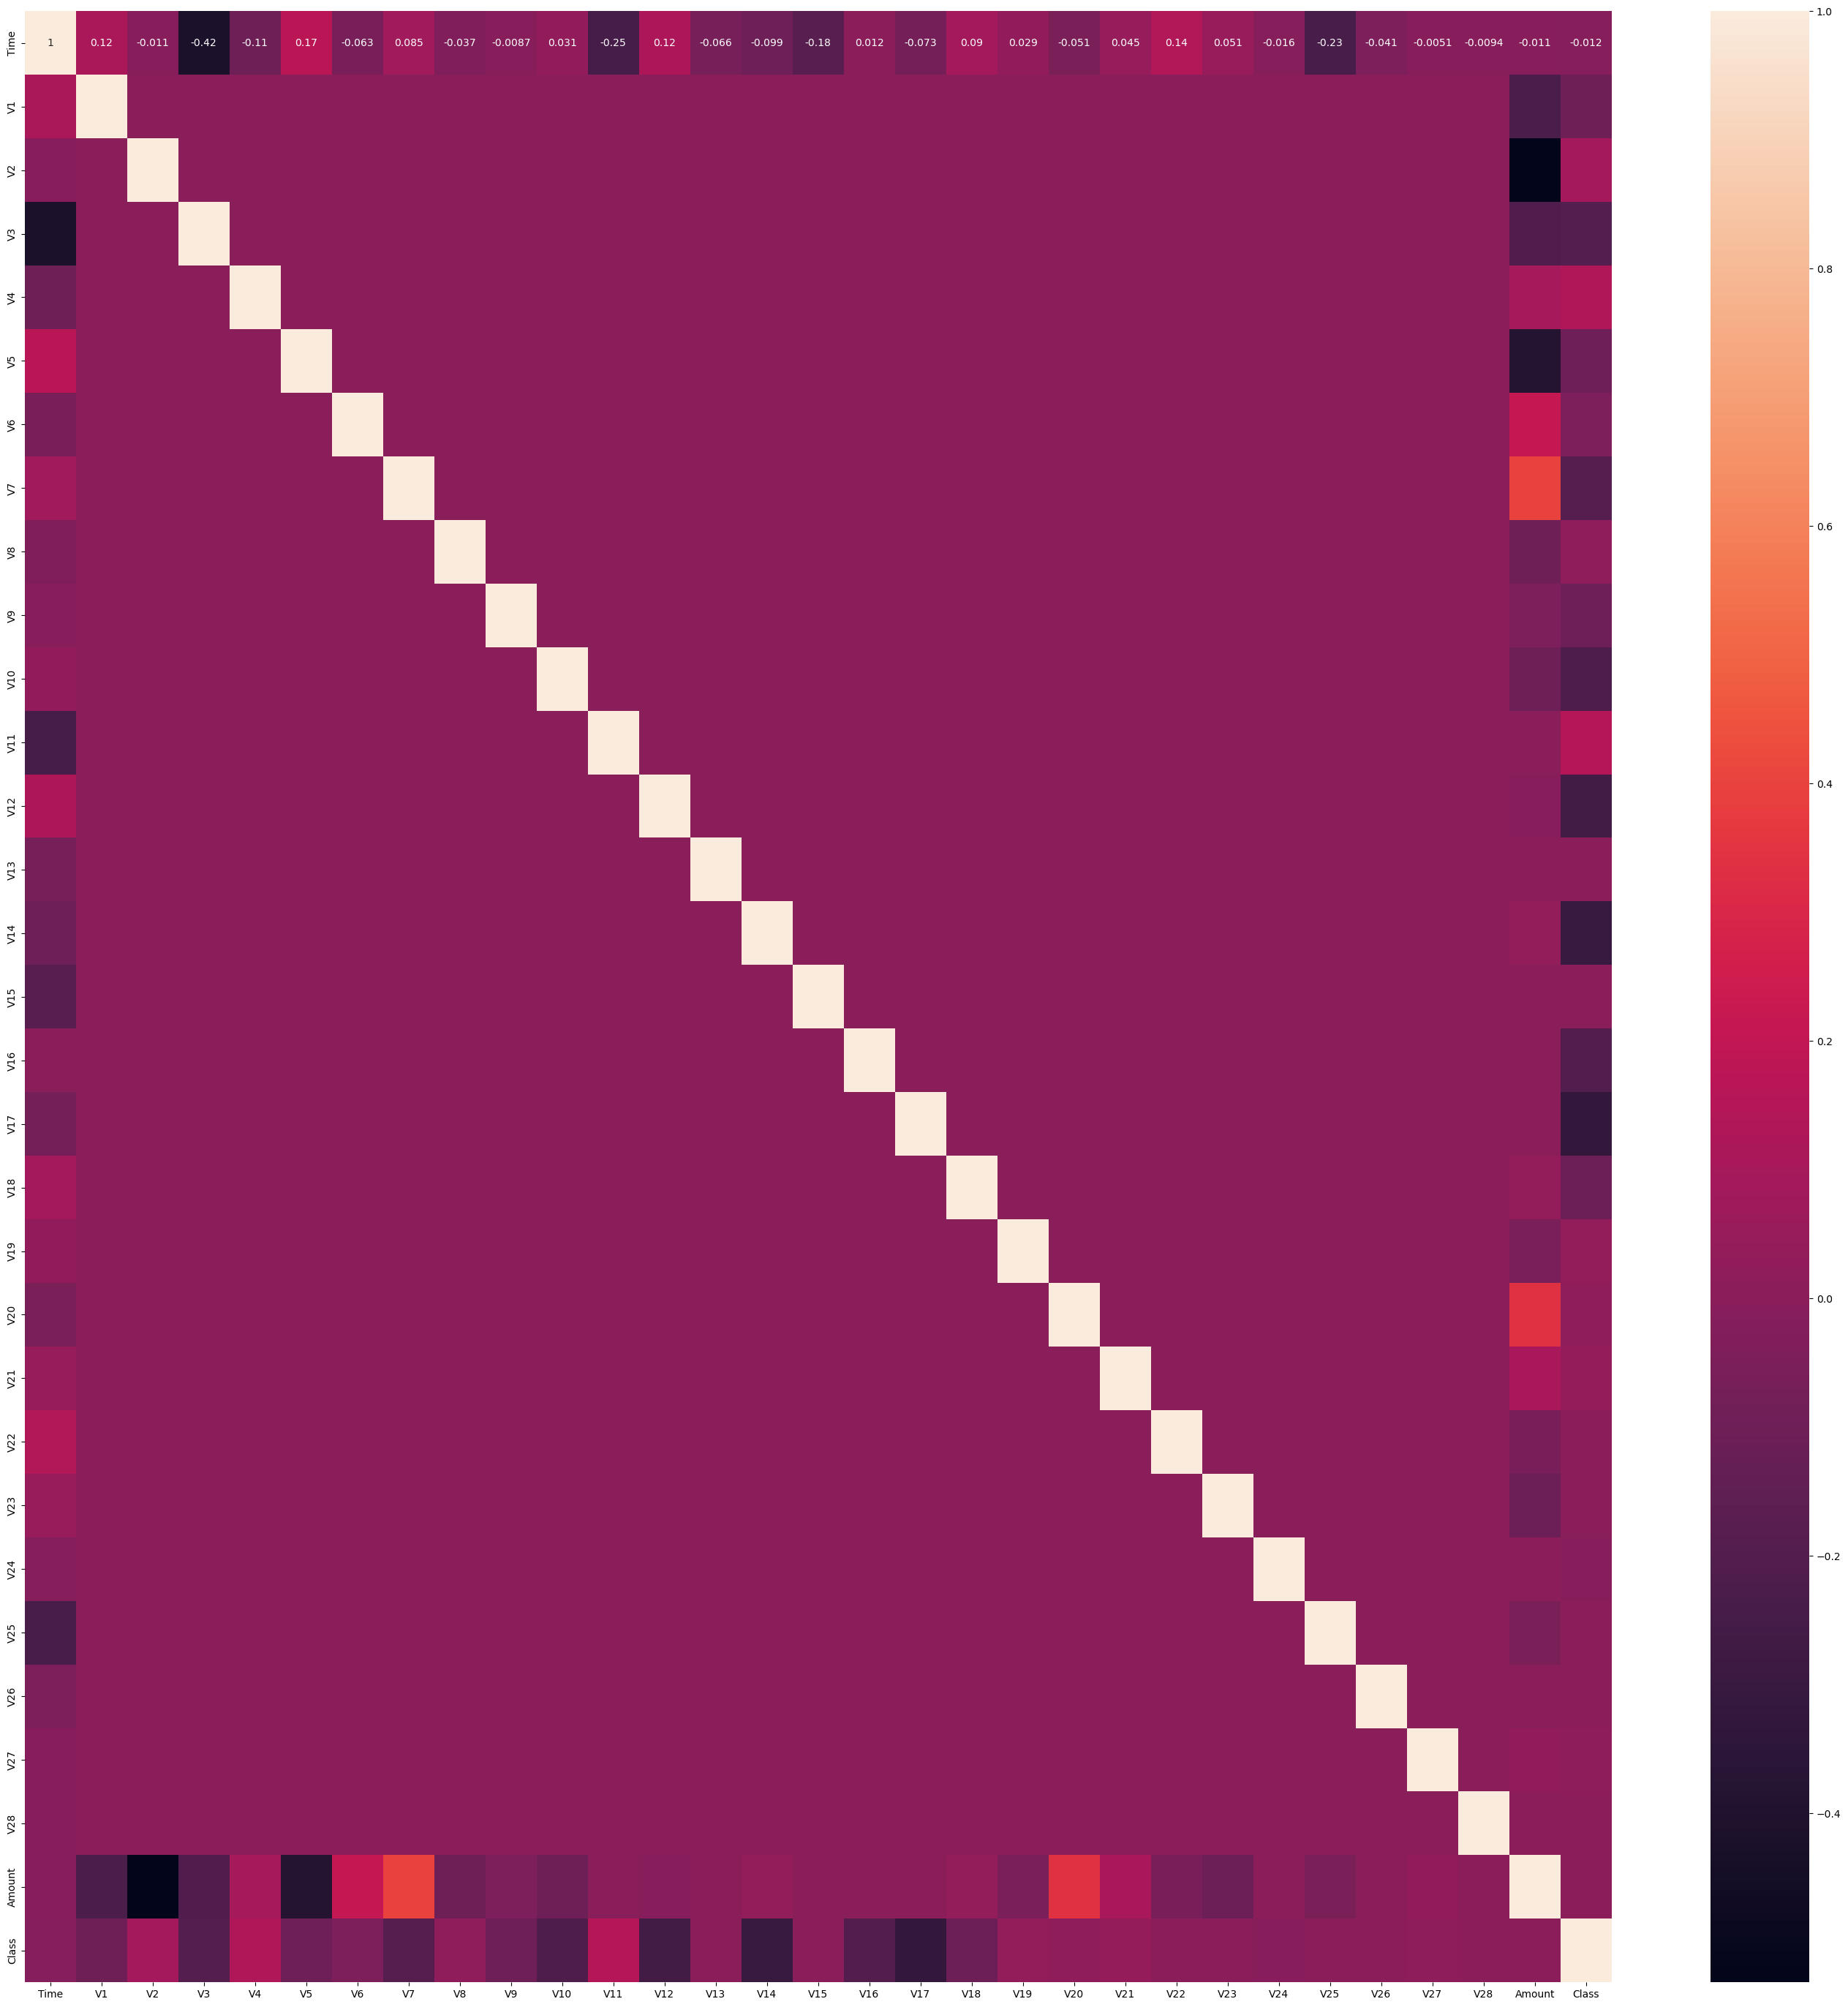

In [7]:
plt.figure(figsize = (35,35))
sns.heatmap(data.corr(), annot = True)

In [8]:
scale = StandardScaler()
data_transformed = scale.fit_transform(data)

In [9]:
data_transformed = pd.DataFrame(data_transformed, columns=data.columns)

In [10]:
data_transformed['Class'] = data['Class']

<Axes: >

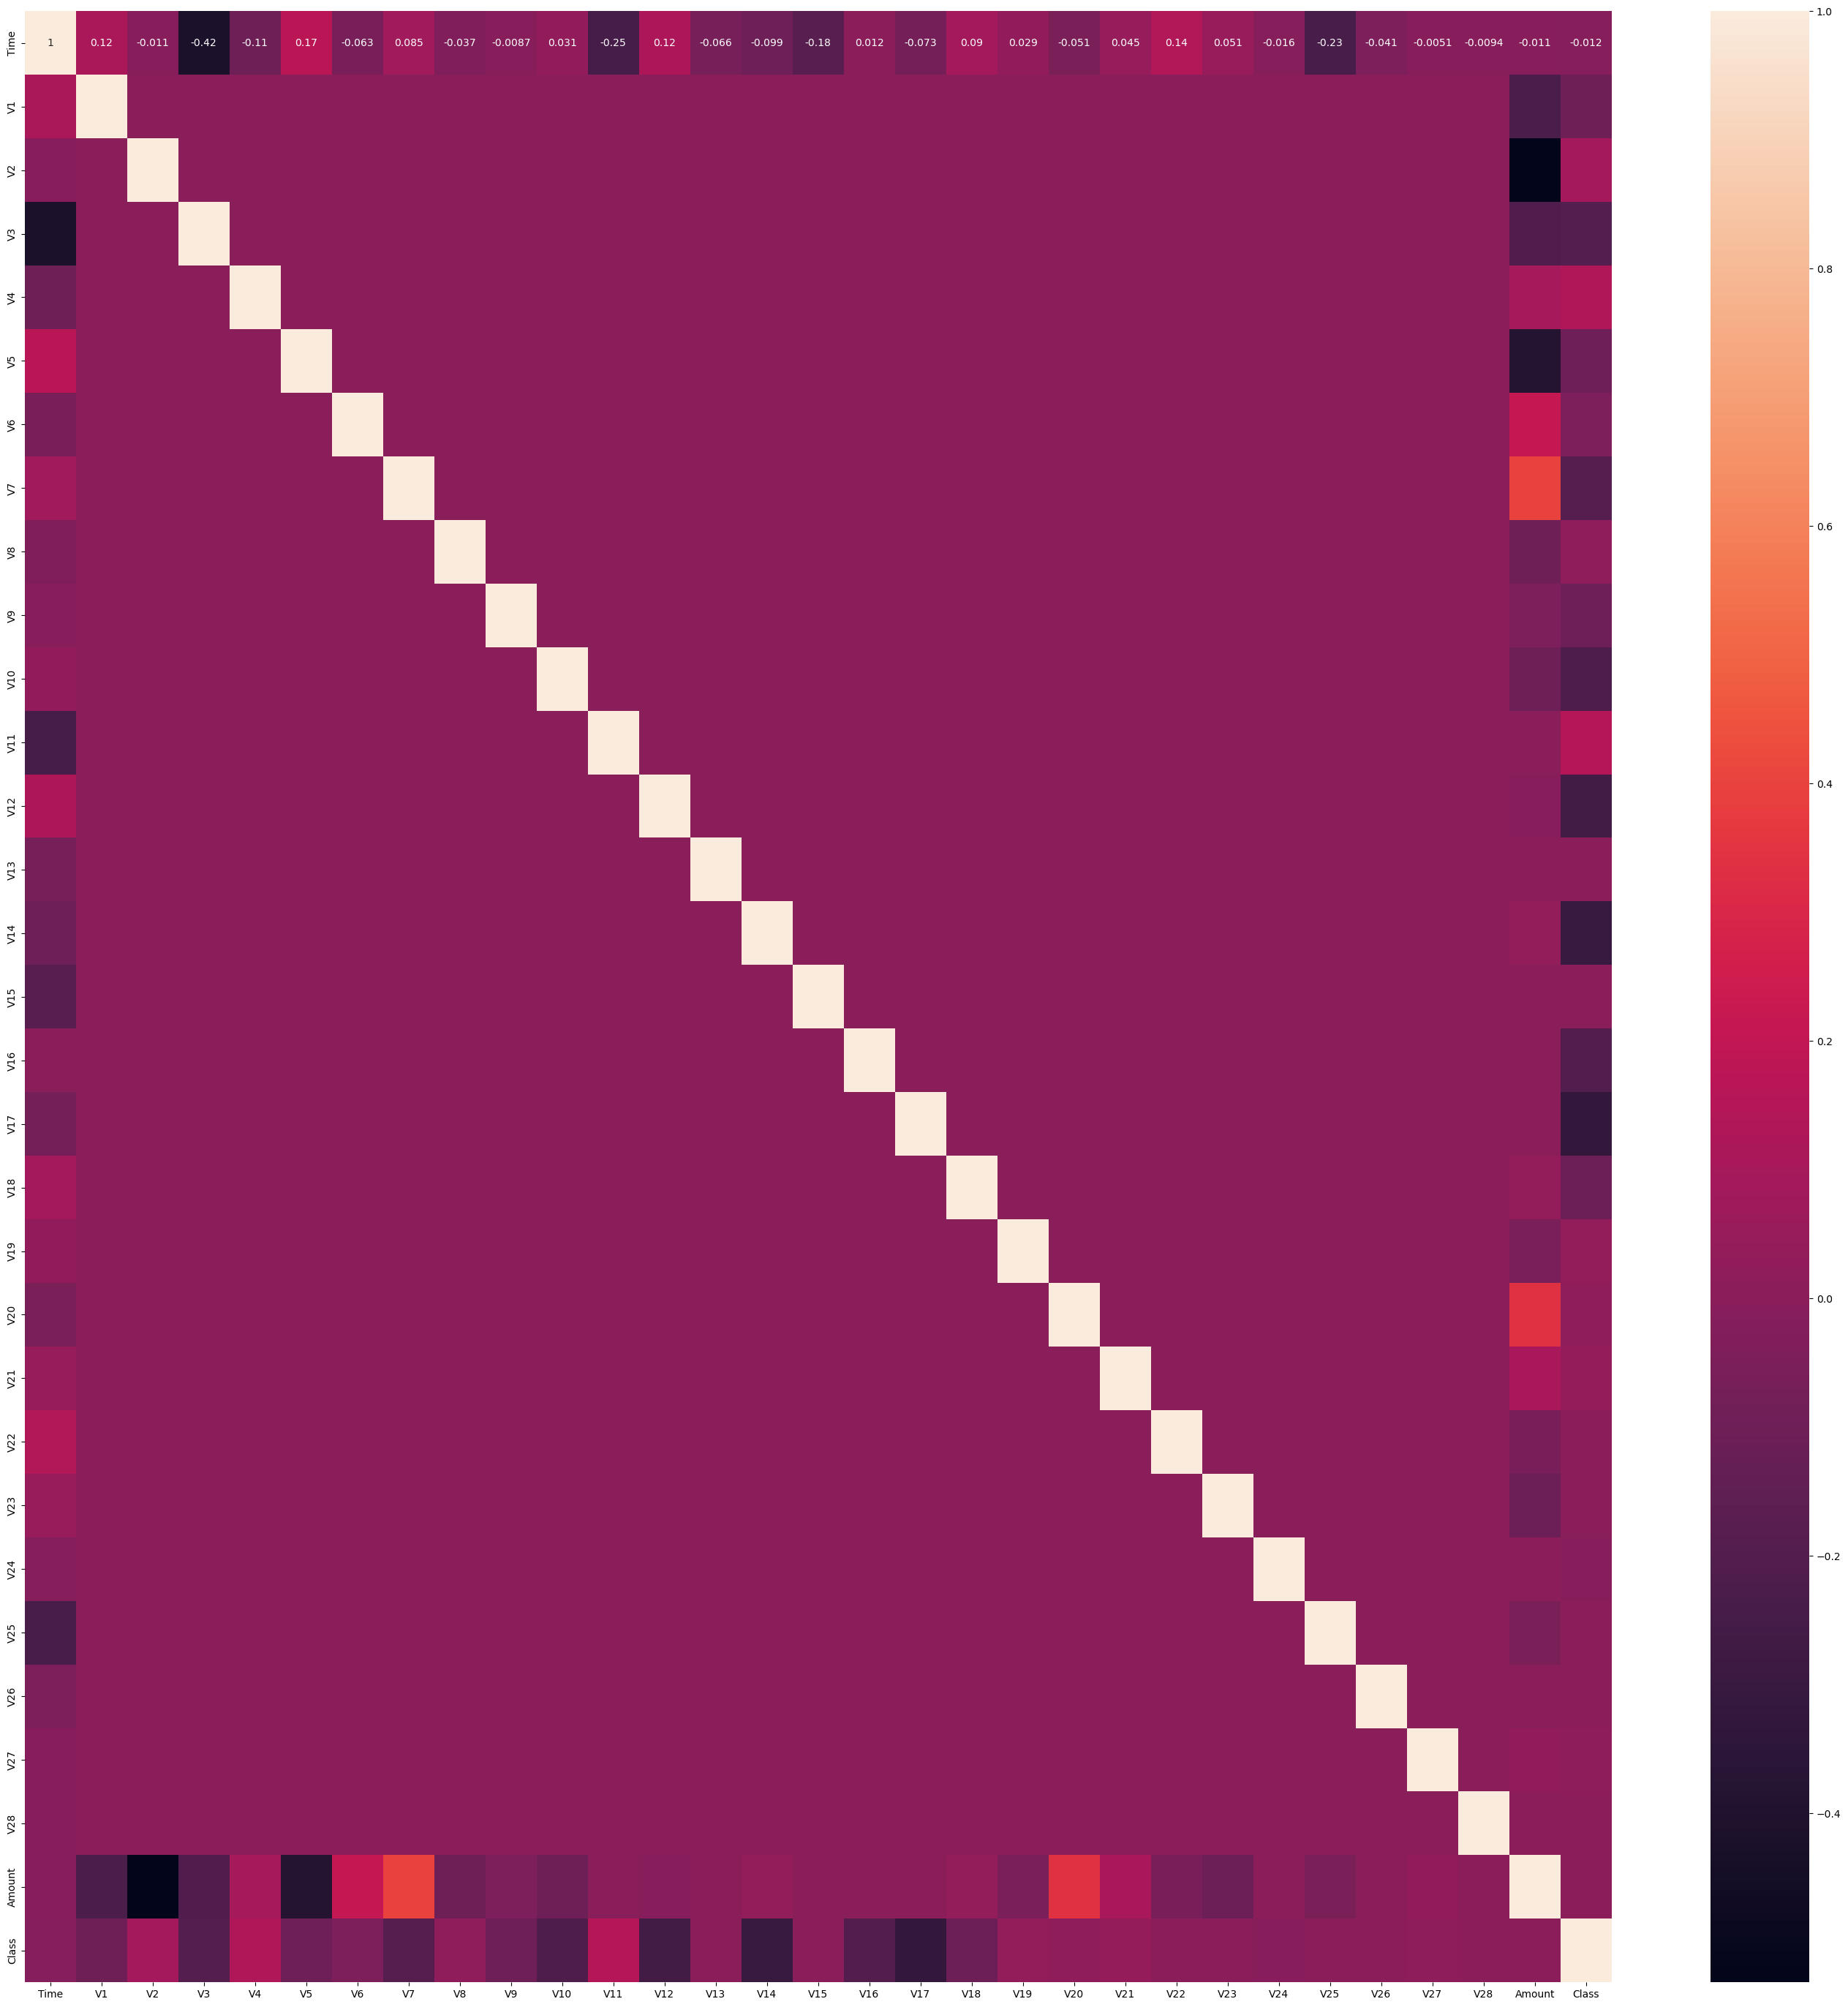

In [11]:
plt.figure(figsize = (35,35))
sns.heatmap(data_transformed.corr(), annot = True)

In [12]:
X = data_transformed.drop(columns = 'Class')

In [13]:
y = data_transformed['Class']

In [14]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.3, random_state=42)

In [15]:
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((199364, 30), (85443, 30), (199364,), (85443,))

In [16]:
train_y.value_counts(), test_y.value_counts()

(0    199008
 1       356
 Name: Class, dtype: int64,
 0    85307
 1      136
 Name: Class, dtype: int64)

In [17]:
model_dt = DecisionTreeClassifier()

In [18]:
model_dt.fit(train_X, train_y)

DecisionTreeClassifier()

In [19]:
train_pred = model_dt.predict(train_X)
test_pred = model_dt.predict(test_X)

In [20]:
print('TRAIN EVALUATION')
confusion_matrix(train_y, train_pred)
print(classification_report(train_y, train_pred))

TRAIN EVALUATION
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199008
           1       1.00      1.00      1.00       356

    accuracy                           1.00    199364
   macro avg       1.00      1.00      1.00    199364
weighted avg       1.00      1.00      1.00    199364



In [21]:
print('TEST EVALUATION')
confusion_matrix(test_y, test_pred)
print(classification_report(test_y, test_pred))

TEST EVALUATION
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.69      0.80      0.74       136

    accuracy                           1.00     85443
   macro avg       0.85      0.90      0.87     85443
weighted avg       1.00      1.00      1.00     85443



## Undersampling Method

In [22]:
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(train_X, train_y)

In [23]:
y_rus.value_counts()

0    356
1    356
Name: Class, dtype: int64

In [24]:
pd.concat([X_rus,y_rus], axis = 1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
262687,1.385320,1.166634,-0.740112,-1.146783,-1.330288,-0.334860,-0.376856,-0.523612,-0.190072,-1.825711,...,-0.376515,-0.704436,0.381486,0.393144,-0.260376,-0.709777,-0.090162,-0.180818,-0.181312,0
170727,0.537275,1.161479,-0.896421,-0.469417,-1.308548,-0.771900,0.270689,-1.252884,0.127960,-1.091317,...,-0.540858,-0.990799,0.673507,-0.066761,-1.052206,-1.019908,0.080654,-0.138168,-0.313328,0
16744,-1.404750,0.496046,-0.358063,0.402741,0.205277,0.190052,2.039558,-0.874287,0.766054,0.737959,...,0.022035,0.363158,-0.032100,-3.571156,0.067542,1.034587,0.182115,-0.015555,-0.189508,0
27488,-1.268632,0.530318,-0.243733,0.440845,0.176438,0.289646,2.056334,-0.851401,0.722615,0.589586,...,0.010838,0.510666,-0.004174,-3.503228,0.164108,1.033313,0.215737,-0.026057,-0.326202,0
245293,1.218604,-0.718193,-0.962496,0.966451,0.267823,1.007360,-0.338302,-0.154486,-0.199378,0.806281,...,0.135125,1.393848,1.553307,1.049196,-1.029740,1.294130,-0.400763,-0.812720,-0.307251,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42674,-1.129123,-4.031713,3.258645,-5.573717,5.624775,-5.696397,-1.784039,-9.659531,4.229374,-6.291540,...,3.482457,1.276392,0.052517,1.053540,0.694232,0.921925,2.730021,0.623959,-0.347152,1
33276,-1.213923,-4.045500,-3.148030,-1.978578,3.122235,1.646226,-2.547897,-4.270853,0.110201,0.599088,...,-0.999708,-0.826686,-7.860083,0.677244,-2.239999,1.079385,4.799972,-4.703648,-0.304013,1
182992,0.648545,0.964734,0.649849,-1.106688,2.947502,0.735751,-0.007047,-0.064430,0.053645,-0.650371,...,0.277361,1.011155,-0.058546,0.551982,0.282328,0.579721,0.078460,0.108710,-0.340356,1
154697,0.164486,-2.155122,1.738697,-3.883731,4.866952,-2.466878,-0.866487,-6.256553,2.387375,-2.282450,...,2.206319,2.160599,-0.925613,-0.097491,-3.509014,-0.150197,0.338760,-1.817264,-0.322884,1


<Axes: >

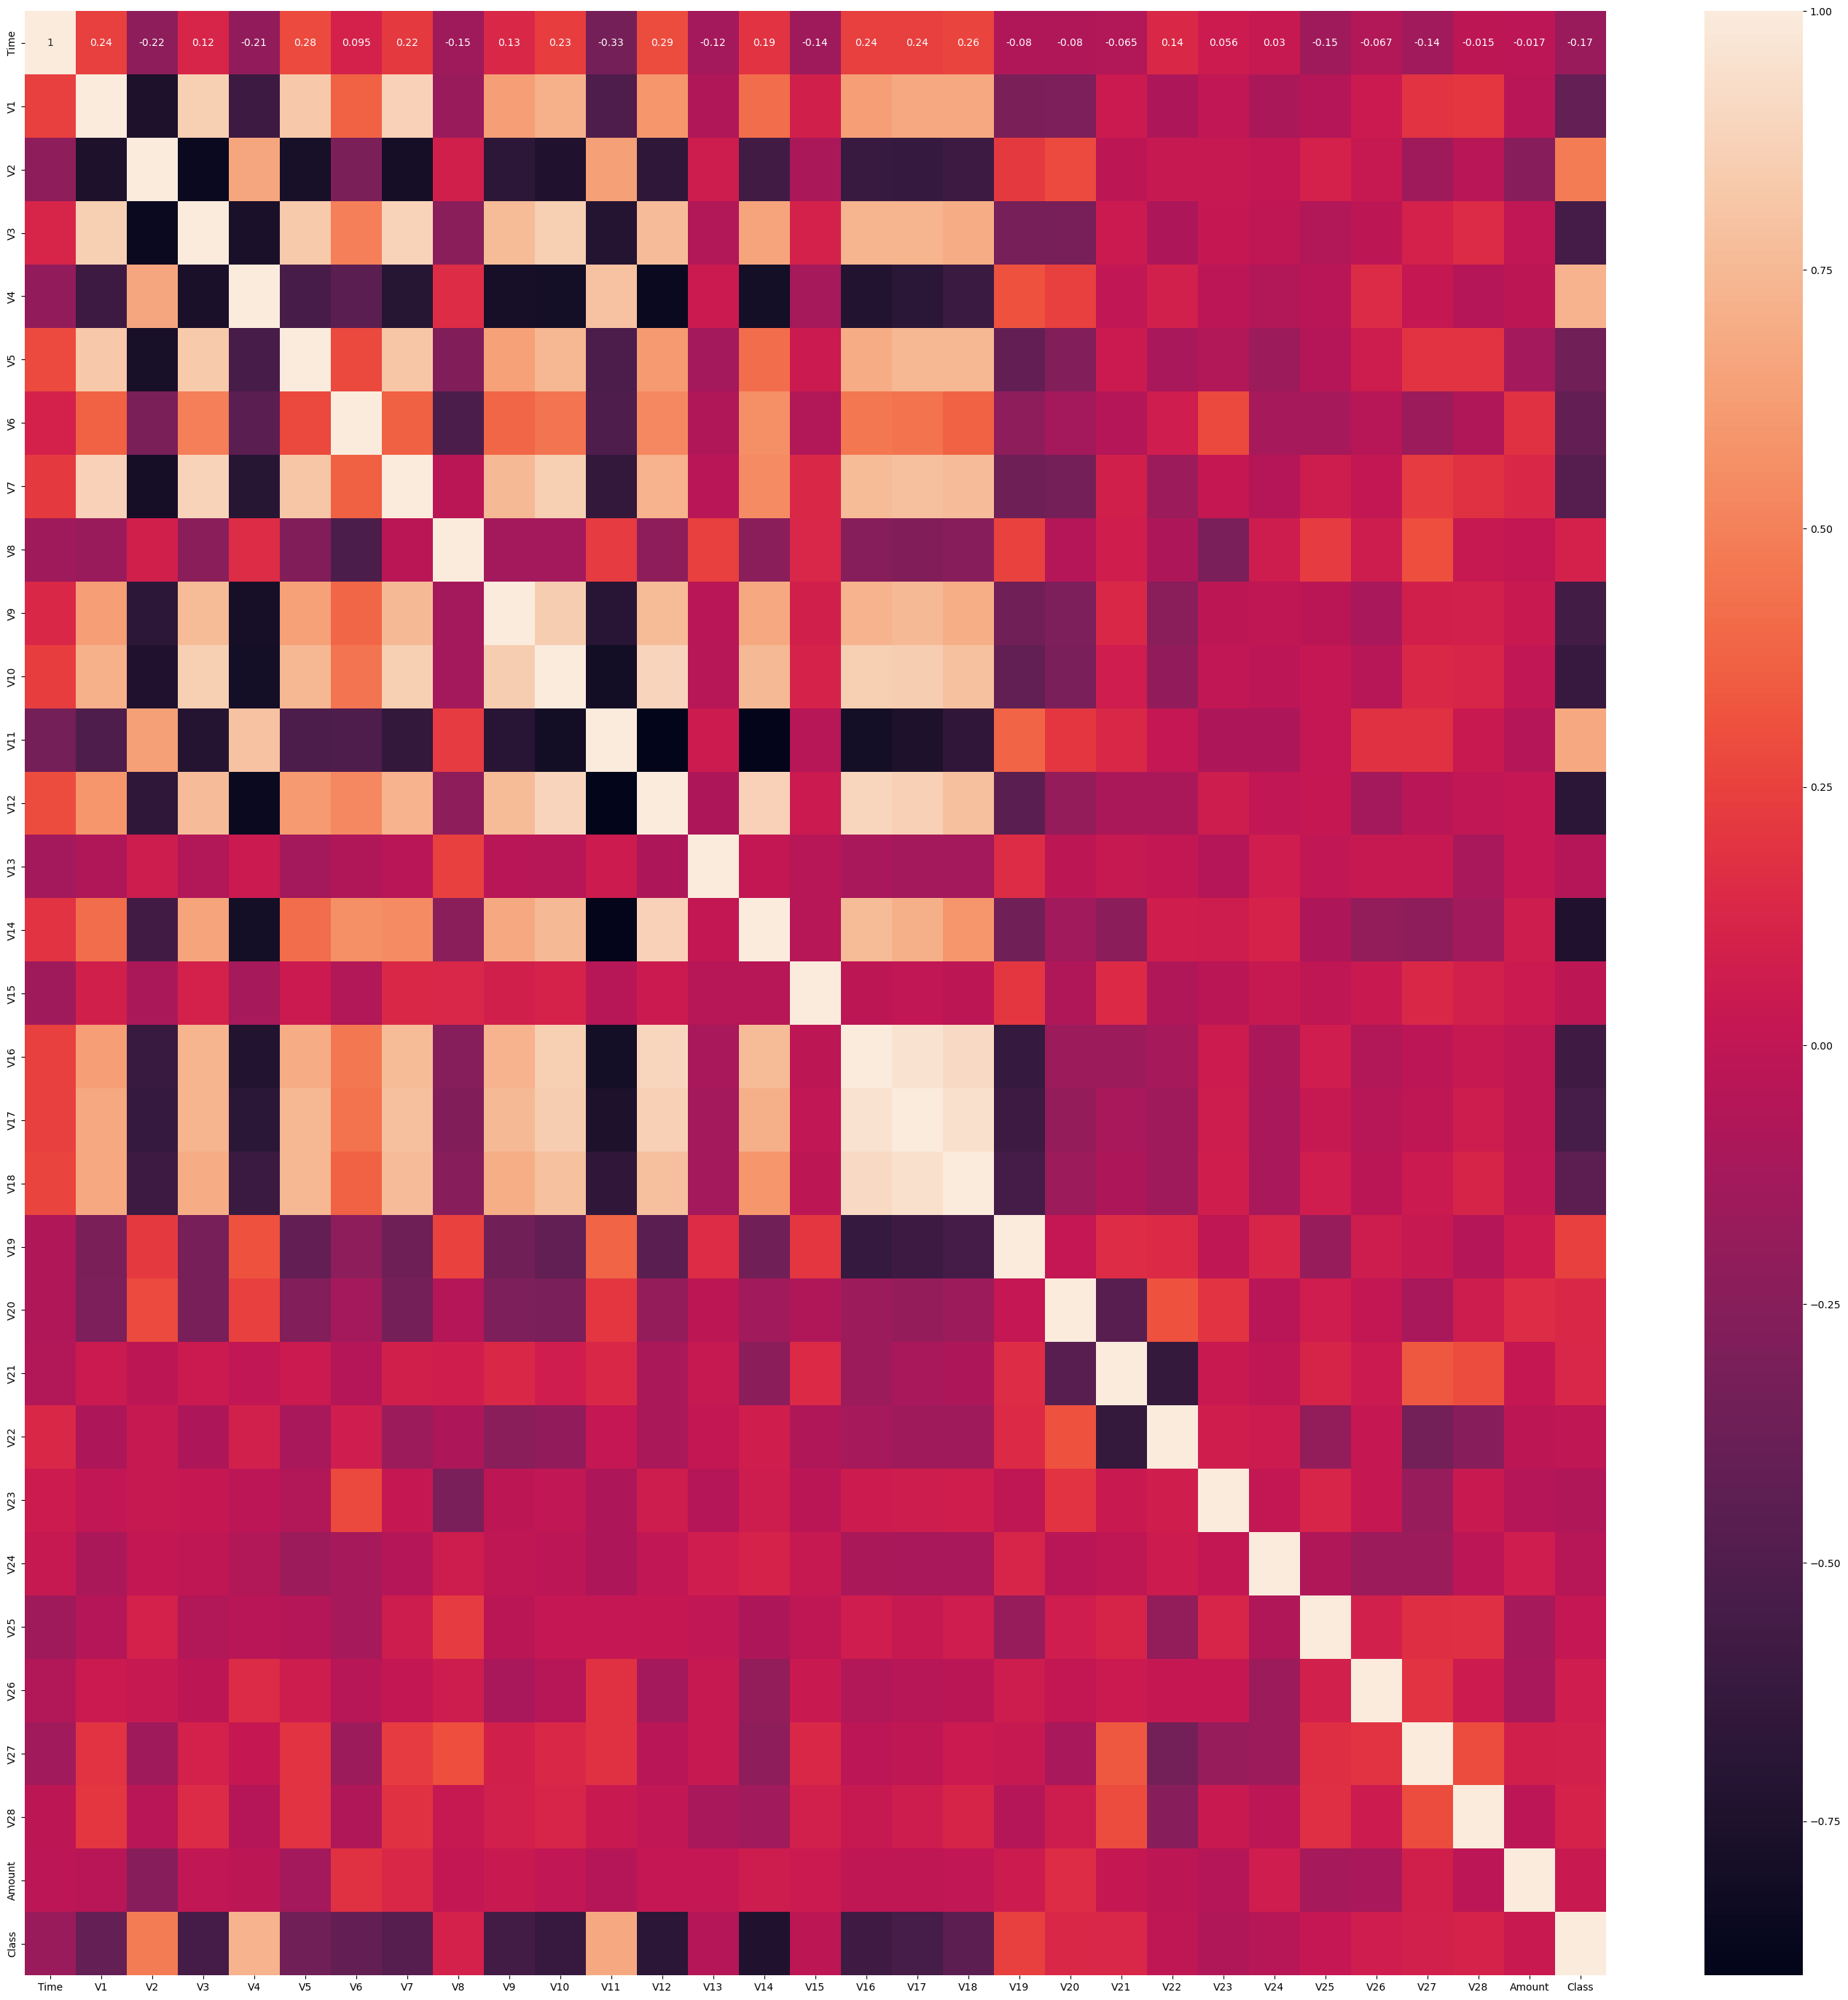

In [25]:
plt.figure(figsize = (35,35))
sns.heatmap(pd.concat([X_rus,y_rus], axis = 1).corr(), annot = True)

In [26]:
model_dt_rus = DecisionTreeClassifier()

In [27]:
model_dt_rus.fit(X_rus, y_rus)

DecisionTreeClassifier()

In [28]:
train_pred = model_dt_rus.predict(X_rus)
test_pred = model_dt_rus.predict(test_X)

In [29]:
print('TRAIN EVALUATION')
print(confusion_matrix(y_rus, train_pred))
print(classification_report(y_rus, train_pred))

TRAIN EVALUATION
[[356   0]
 [  0 356]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       356
           1       1.00      1.00      1.00       356

    accuracy                           1.00       712
   macro avg       1.00      1.00      1.00       712
weighted avg       1.00      1.00      1.00       712



In [30]:
print('TEST EVALUATION')
print(confusion_matrix(test_y, test_pred))
print(classification_report(test_y, test_pred))

TEST EVALUATION
[[77231  8076]
 [    7   129]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     85307
           1       0.02      0.95      0.03       136

    accuracy                           0.91     85443
   macro avg       0.51      0.93      0.49     85443
weighted avg       1.00      0.91      0.95     85443



# Traditional ML + MLOps

In [26]:
import mlflow
from mlflow.models import infer_signature

In [27]:
experiment = mlflow.set_experiment('CreditCard Fraud Experiment in Inceptez')

In [28]:
experiment.name

'CreditCard Fraud Experiment in Inceptez'

In [29]:
experiment.experiment_id

'753768921086829944'

In [ ]:
DecisionTreeClassifier()

In [30]:
max_depth = [1,2,3,4,5]
criterion = ['gini', 'entropy']
max_features = ["auto", "sqrt", "log2"]

In [61]:
for c in criterion:
    for mf in max_features:
        for md in max_depth:
            with mlflow.start_run(experiment_id = experiment.experiment_id, run_name = 'Manual grid search'):
                model_dt_rus_mlflow = DecisionTreeClassifier(criterion=c, max_features=mf, max_depth=md)
                model_dt_rus_mlflow.fit(X_rus, y_rus)
                train_pred = model_dt_rus_mlflow.predict(X_rus)
                test_pred = model_dt_rus_mlflow.predict(test_X)
                train_recall = recall_score(y_rus, train_pred)
                test_recall = recall_score(test_y, test_pred)
                params = {"criterion" :c, "max_features":mf, "max_depth":md}
                mlflow.log_params(params)
                mlflow.log_metric("train_recall", train_recall)
                mlflow.log_metric("test_recall", test_recall)
                # Set a tag that we can use to remind ourselves what this run was for
                mlflow.set_tag("Credit Fraud Transaction", "Manual Hyper parameter tunning")
                # Infer the model signature
                signature = infer_signature(X_rus, model_dt_rus_mlflow.predict(X_rus))
                # Log the model
                model_info = mlflow.sklearn.log_model(
                    sk_model=model_dt_rus_mlflow,
                    artifact_path="creditcard_fraud",
                    signature=signature,
                    input_example=X_rus,
                    registered_model_name="CreditCard Fraud Experiment in Inceptez",
                )
                
                
                
                
                
            
        

/Users/mohamednoordeenalaudeen/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/mohamednoordeenalaudeen/opt/anaconda3/lib/python3.9/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Successfully registered model 'CreditCard Fraud Experiment in Inceptez'.
Created version '1' of model 'CreditCard Fraud Experiment in Inceptez'.
/Users/mohamednoordeenalaudeen/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
Registered model 'CreditCard Fraud Experiment in Inceptez' already exists. Creating a new ve

In [ ]:
!mlflow ui

[2025-02-02 09:08:04 +0400] [3364] [INFO] Starting gunicorn 21.2.0
[2025-02-02 09:08:04 +0400] [3364] [INFO] Listening at: http://127.0.0.1:5000 (3364)
[2025-02-02 09:08:04 +0400] [3364] [INFO] Using worker: sync
[2025-02-02 09:08:04 +0400] [3365] [INFO] Booting worker with pid: 3365
[2025-02-02 09:08:04 +0400] [3366] [INFO] Booting worker with pid: 3366
[2025-02-02 09:08:04 +0400] [3367] [INFO] Booting worker with pid: 3367
[2025-02-02 09:08:04 +0400] [3368] [INFO] Booting worker with pid: 3368
[2025-02-02 09:08:40 +0400] [3364] [CRITICAL] WORKER TIMEOUT (pid:3367)
[2025-02-02 09:08:40 +0400] [3367] [INFO] Worker exiting (pid: 3367)
[2025-02-02 09:08:40 +0400] [3364] [ERROR] Worker (pid:3367) exited with code 1
[2025-02-02 09:08:40 +0400] [3364] [ERROR] Worker (pid:3367) exited with code 1.
[2025-02-02 09:08:40 +0400] [3385] [INFO] Booting worker with pid: 3385


In [33]:
for c in criterion:
    for mf in max_features:
        for md in max_depth:
            run_name = "rf:"+"Crit"+str(c)+"mf:"+str(mf)+"md"+str(md)
            with mlflow.start_run(experiment_id = experiment.experiment_id, run_name = run_name):
                model_dt_rus_mlflow = RandomForestClassifier(criterion=c, max_features=mf, max_depth=md)
                model_dt_rus_mlflow.fit(X_rus, y_rus)
                train_pred = model_dt_rus_mlflow.predict(X_rus)
                test_pred = model_dt_rus_mlflow.predict(test_X)
                train_recall = recall_score(y_rus, train_pred)
                test_recall = recall_score(test_y, test_pred)
                params = {"criterion" :c, "max_features":mf, "max_depth":md}
                mlflow.log_params(params)
                mlflow.log_metric("train_recall", train_recall)
                mlflow.log_metric("test_recall", test_recall)
                # Set a tag that we can use to remind ourselves what this run was for
                mlflow.set_tag("Credit Fraud Transaction", "Manual Hyper parameter tunning")
                # Infer the model signature
                signature = infer_signature(X_rus, model_dt_rus_mlflow.predict(X_rus))
                # Log the model
                model_info = mlflow.sklearn.log_model(
                    sk_model=model_dt_rus_mlflow,
                    artifact_path="creditcard_fraud",
                    signature=signature,
                    input_example=X_rus,
                    registered_model_name="CreditCard Fraud Experiment in Inceptez",
                )

/Users/mohamednoordeenalaudeen/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mohamednoordeenalaudeen/opt/anaconda3/lib/python3.9/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Registered model 'CreditCard Fraud Experiment in Inceptez' already exists. Creating a new version of this model...
Created version '31' of model 'CreditCard Fraud Experiment in Inceptez'.
/Users/mohamednoordeenalaudeen/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behavio

In [69]:
import mlflow
logged_model = 'runs:/a9ffee1a8a254ac798472e77df802e7d/creditcard_fraud'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

# Predict on a Pandas DataFrame.
import pandas as pd
loaded_model.predict(pd.DataFrame(test_X))

array([1, 0, 0, ..., 1, 0, 0])

# Auto ML + MLOps

In [35]:
data = pd.concat([X_rus,y_rus], axis = 1).reset_index().drop(columns='index')

In [37]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [39]:
data.to_csv('credit_card_experiment.csv', index = False)